ID 14483 has a strange path.
ID 2335 has branches
ID 2335 has a strange path.
ID 9633 has a strange path.
ID 13549 has branches


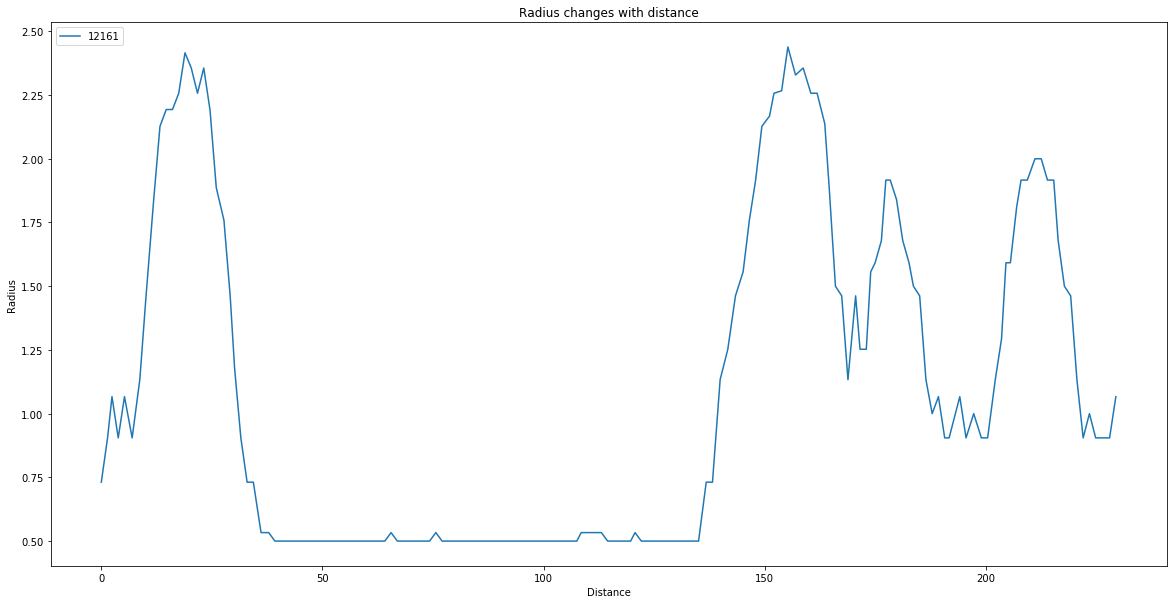

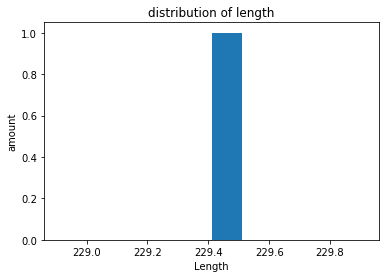

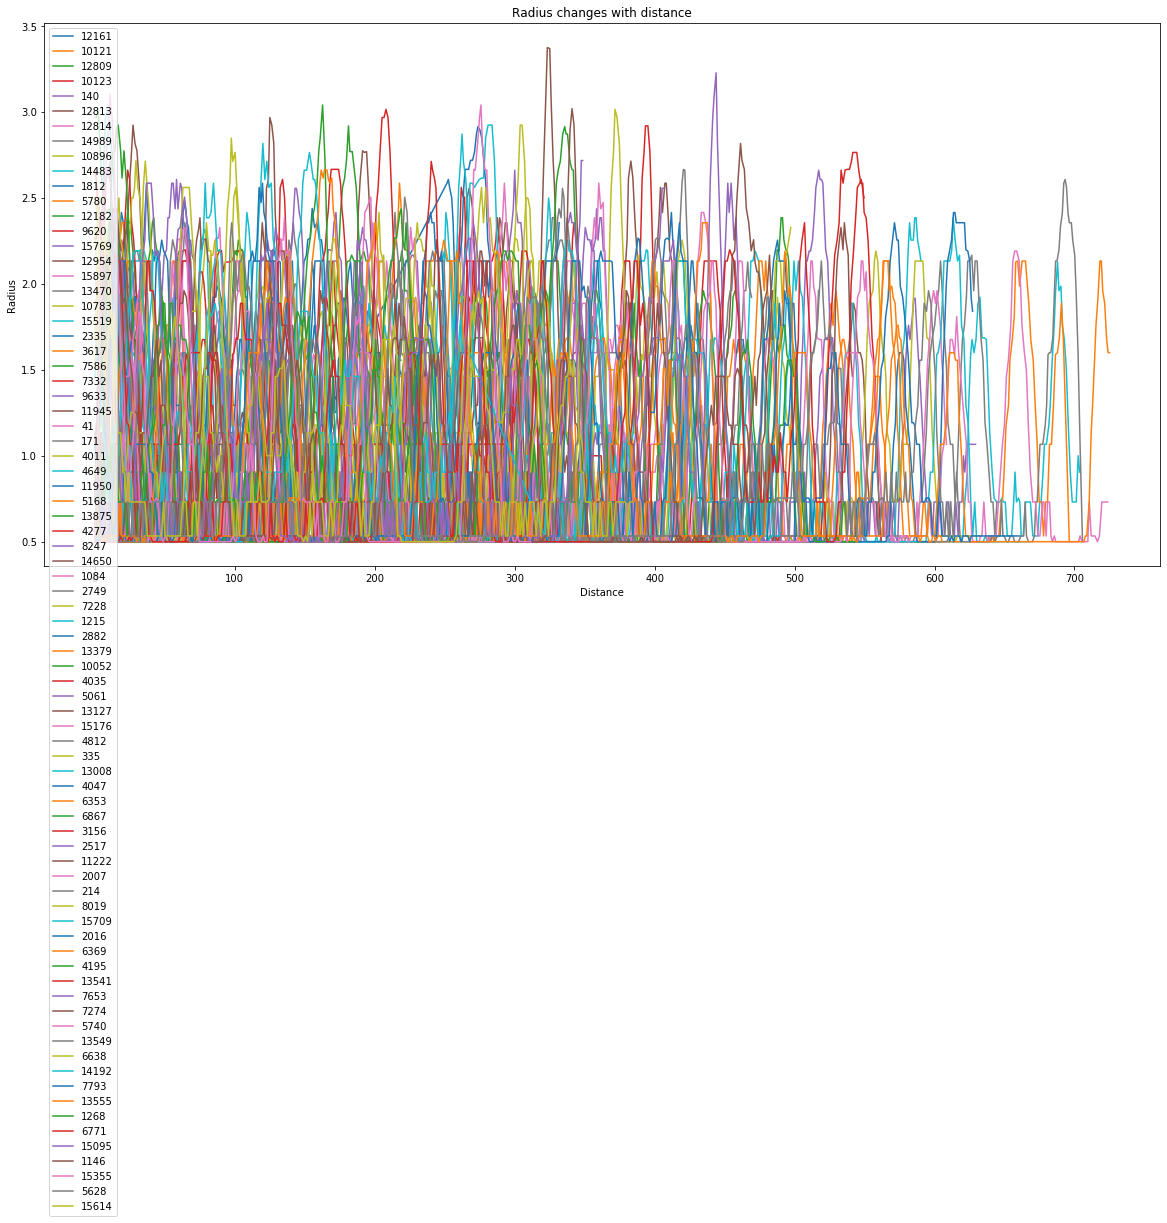

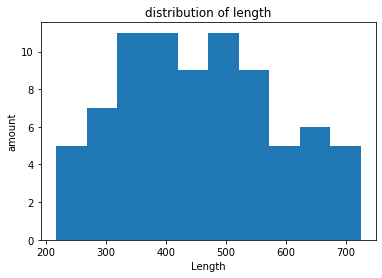

In [1]:
import pdb
import h5py
import numpy as np
import kimimaro
import matplotlib.pyplot as plt
import pickle
from spinecode import mesh, skel
from skimage import data
from skimage.filters import threshold_otsu, threshold_local

out_f = '/n/pfister_lab2/Lab/silin'
skels = np.load('{}/skeleton3.p'.format(out_f), allow_pickle=True)
scale_x = 32
scale_y = 32
scale_z = 30
scale_radius = 60
dis_threshold = 100




def vertices(skels,filepath):
    #bad points: sp = [11778(has branch)]
    
    nums = list(np.loadtxt(filepath, int))
    nums.remove(11778)
    
    vertices_ordered = {}
    vertices_radius = {}
    
    for num in nums:
        p_1 = skels[num].interjoint_paths() 
        
        p_2 = skels[num].paths()
        
        if len(p_1) != len(p_2):
            # has branch
            print("ID {} has branches".format(str(num)))
            
            
        #  manual modification
        if num == 2335:
            del p_1[6]
        if num == 14483:
            a = p_1[0]
            p_1[0] = p_1[1]
            p_1[1] = a
        if num == 7332:
            a = p_1[3]
            p_1[3] = p_1[4]
            p_1[4] = a
        if num == 4277:
            a = p_1[0]
            p_1[0] = p_1[1]
            p_1[1] = a
            p_1[0] = p_1[0][::-1]
        if num == 4649 or num == 11222:
            p_1[0] = p_1[0][::-1]
        if num ==5628:
            p_1[-1] = p_1[-1][::-1]
        if num == 6369:
            a = p_1[-1]
            p_1[-1] = p_1[-2]
            p_1[-2] = a
            p_1[-1] = p_1[-1][::-1]
            p_1[-2] = p_1[-2][::-1]
            
            
        v_ordered = p_1[0].tolist() # ordered vertices
        for i in range(1,len(p_1)):
            if d3_distance(p_1[i][1],v_ordered[-1])> dis_threshold:
                print("ID {} has a strange path.".format(str(num)))
            v_ordered.extend(p_1[i].tolist())
        
        vertices_ordered[num] = v_ordered
        
        # build a dictionary to map coordiante and radius
        v = skels[num].vertices.tolist()
        r = list(skels[num].radius/scale_radius)
        D = {tuple(v[i]): r[i] for i in range(len(v))} 
        
        vertices_radius[num] = D
    return vertices_ordered, vertices_radius



def d3_distance(v1,v2):
    return np.sqrt(((v1[0]-v2[0])/scale_x)**2 + ((v1[1]-v2[1])/scale_y)**2 + ((v1[2]-v2[2])/scale_z)**2)  ## consider the scale for distance


def euclidean_distance(skels,vertices_ordered, vertices_radius,nums = [12954],filepath = None):
    ## plot width vs. distance from the first skel point
    
    #bad points: sp = [11778(has branch)]
    
    if filepath: 
        nums = list(np.loadtxt(filepath, int))
        nums.remove(11778)
        
    fig = plt.figure(figsize=(20,10))
    Length = []
    for num in nums:
        v_ordered = vertices_ordered[num]
        D = vertices_radius[num]
        
        dis_width =[(0,D[tuple(v_ordered[0])])] 
        for i in range(1, len(v_ordered)):
            x = d3_distance(v_ordered[i],v_ordered[i-1])
            dis_width.append((dis_width[-1][0] + x, D[tuple(v_ordered[i])]))
        

        
        min_radius = min(skels[num].radius/scale_radius)
        max_radius = max(skels[num].radius/scale_radius)
        
        Length.append(dis_width[-1][0])
        # plot
        # You can soomth it if you want
        plt.plot([i[0] for i in dis_width],[i[1] for i in dis_width],label='{}'.format(str(num)))

        # plt.text(dis[-1]-100, max_radius, 'max radius: {}'.format(str(max_radius)))
        # plt.text(dis[-1]-100, max_radius-10, 'min radius: {}'.format(str(min_radius)))
        
        
    plt.xlabel("Distance")
    plt.ylabel("Radius")    
    plt.legend(loc=2)
    plt.title("Radius changes with distance")
    plt.show()
    
    # plot the distribution of length
    plt.figure()
    plt.hist(Length)
    plt.title("distribution of length")
    plt.xlabel("Length")
    plt.ylabel("amount")
    plt.show()
    
    return Length
    



    
    
    
v_ordered, v_radius = vertices(skels,filepath='/n/pfister_lab2/Lab/donglai/mito/db/30um_rat/mito_len500_bead.txt')
euclidean_distance(skels,v_ordered, v_radius,nums=[12161])
Length = euclidean_distance(skels,v_ordered, v_radius,filepath='/n/pfister_lab2/Lab/donglai/mito/db/30um_rat/mito_len500_bead.txt')


In [2]:
# ## double check the path
# filepath = '/n/pfister_lab2/Lab/donglai/mito/db/30um_rat/mito_len500_bead.txt'
# nums = list(np.loadtxt(filepath, int))
# nums.remove(11778)
# for num in nums:
#     v = v_ordered[num]
#     for i in range(skels[num].edges.shape[0]):
        
#         #print(v)
#         #print(skels[num].vertices[skels[num].edges[i][0]])
#         for j in range(len(v)):
#             if v[j] == skels[num].vertices[skels[num].edges[i][0]].tolist():
#                 #print(j)
#                 #print(len(v))
#                 s = skels[num].vertices[skels[num].edges[i][1]].tolist()
#                 if j == 0: 
#                     if v[1] != s:
#                         print("num {0},{1} is wrong".format(str(num),str(i)))
#                         break
#                 elif j == (len(v)-1):
#                     if v[-2]!= s:
#                         print("num {0},{1} is wrong".format(str(num),str(i)))
#                         break
#                 elif v[j+1]!= s and v[j-1] != s:
#                     print("num {0},{1} is wrong".format(str(num),str(i)))
#                     break

thick mito:  10896
thick mito:  12182
thick mito:  15897
thick mito:  3156
thick mito:  6638
thick mito:  14192
[5, 10, 8, 6, 9, 8, 7, 5, 11, 8, 6, 5, 4, 6, 4, 7, 6, 5, 9, 11, 8, 8, 6, 7, 6, 7, 8, 9, 11, 11, 6, 12, 6, 8, 5, 8, 8, 12, 8, 6, 7, 5, 8, 3, 12, 6, 9, 8, 9, 9, 7, 10, 5, 6, 7, 6, 11, 8, 9, 7, 8, 8, 8, 6, 9, 9, 8, 12, 10, 9, 10, 9, 3, 9, 9, 10, 6, 8, 7]


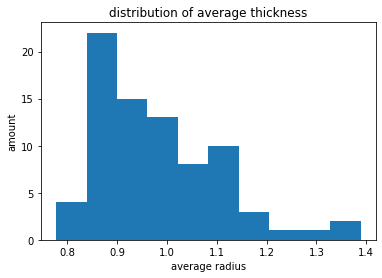

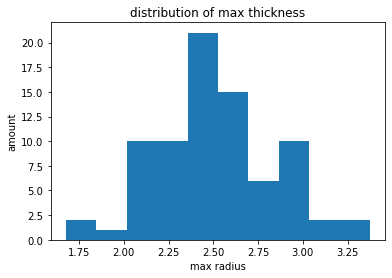

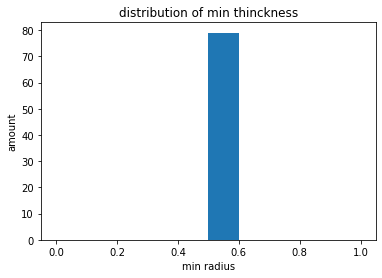

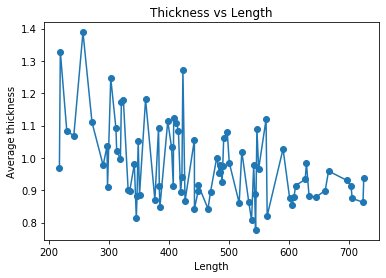

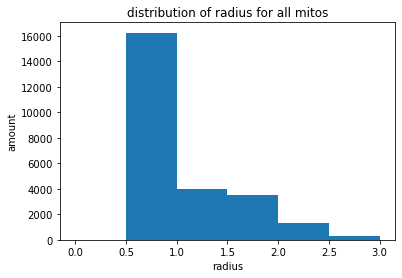

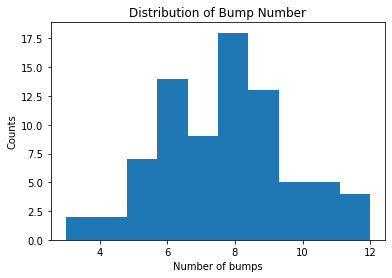

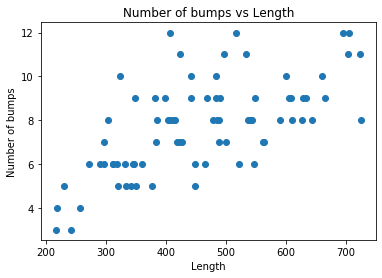

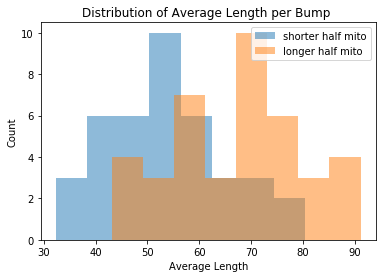

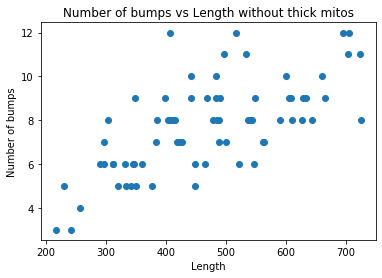

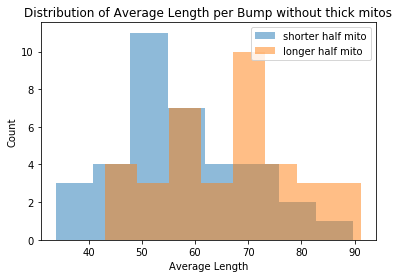

In [3]:
import statistics 
def length_thickness_bump_freq(skels,vertices_ordered, vertices_radius, Length, filepath):
    # plot the frequency of thickness and bump
    nums = list(np.loadtxt(filepath, int))
    nums.remove(11778)
    
    thickness_ave = []
    thickness_max = []
    thickness_min = []
    radius = []
    bump_number = []
    length_per_mito = []
    thick_mito = []
    
    for k in range(len(nums)):
        num = nums[k]
        thickness_ave.append(sum(skels[num].radius)/len(skels[num].radius)/scale_radius)  ## scaling
        thickness_max.append(max(skels[num].radius)/scale_radius)
        thickness_min.append(min(skels[num].radius)/scale_radius)
        radius.extend([i/scale_radius for i in skels[num].radius])
        
        # thick mito
        if statistics.mode(skels[num].radius/scale_radius) >= 0.8:
            print("thick mito: ",num)
            
            thick_mito.append(k)
        
        
        # bump
        
        v_ordered = vertices_ordered[num]
        D = vertices_radius[num]
        r_ordered = []
        for i in range(len(v_ordered)):
            r_ordered.append(D[tuple(v_ordered[i])])
        
        bump_threshold = thickness_ave[-1]+0.2 # not well for thick mitos
        #bump_threshold = threshold_otsu(np.array(r_ordered))
        #bump_threshold = threshold_local(np.array([r_ordered]), 201)
        #print(bump_threshold)
        
        s = 0
        Flag = False
        for i in range(len(v_ordered)):
            if D[tuple(v_ordered[i])] > bump_threshold and not Flag:
                s += 1
                Flag = True
            if D[tuple(v_ordered[i])] <= bump_threshold and Flag:
                Flag = False
   
        bump_number.append(s)
        length_per_mito.append(Length[k]/s)
        

    #print(thick_mito)
    t_l = sorted(list(zip(Length,thickness_ave)))
    b_l = sorted(list(zip(Length,bump_number)))
    l_p_m = sorted(list(zip(Length,length_per_mito)))
   
    b_l_without_thick = []
    l_p_m_without_thick = []
    for i in range(len(Length)):
        if i not in thick_mito:
            b_l_without_thick.append((Length[i],bump_number[i]))
            l_p_m_without_thick.append((Length[i],length_per_mito[i]))
    b_l_without_thick.sort()
    l_p_m_without_thick.sort()
        
    
    #print(len(b_l))
    
    ## plot

    # thickness
    plt.figure()
    plt.hist(thickness_ave)
    plt.title("distribution of average thickness")
    plt.xlabel("average radius")
    plt.ylabel("amount")
    
    plt.figure()
    plt.hist(thickness_max)
    plt.title("distribution of max thickness")
    plt.xlabel("max radius")
    plt.ylabel("amount")
    
    plt.figure()
    plt.hist(thickness_min)
    plt.title("distribution of min thinckness")
    plt.xlabel("min radius")
    plt.ylabel("amount")
    
    plt.figure()
    plt.plot([i[0] for i in t_l],[i[1] for i in t_l],'-o')
    plt.title("Thickness vs Length")
    plt.xlabel("Length")
    plt.ylabel("Average thickness")
    
    
    plt.figure()
    plt.hist(radius,bins=[0,0.5,1,1.5,2,2.5,3])
    plt.title("distribution of radius for all mitos")
    plt.xlabel("radius")
    plt.ylabel("amount")
    
    
    ## bump
    print(bump_number)
    plt.figure()
    plt.hist(bump_number)
    plt.title("Distribution of Bump Number")
    plt.xlabel("Number of bumps")
    plt.ylabel("Counts")
    
    plt.figure()
    plt.scatter([i[0] for i in b_l],[i[1] for i in b_l])
    plt.title("Number of bumps vs Length")
    plt.xlabel("Length")
    plt.ylabel("Number of bumps")
    
    plt.figure()
    plt.hist( [l_p_m[i][1] for i in range(len(l_p_m)//2)], bins = 8, alpha = 0.5, label="shorter half mito")
    plt.hist( [l_p_m[i][1] for i in range(len(l_p_m)//2,len(l_p_m))], bins = 8, alpha = 0.5, label="longer half mito")
    plt.title("Distribution of Average Length per Bump ")
    plt.xlabel("Average Length")
    plt.ylabel("Count")
    plt.legend()
    
    ## bump without thick mitos

    plt.figure()
    plt.scatter([i[0] for i in b_l_without_thick],[i[1] for i in b_l_without_thick])
    plt.title("Number of bumps vs Length without thick mitos")
    plt.xlabel("Length")
    plt.ylabel("Number of bumps")
    
    plt.figure()
    plt.hist( [l_p_m_without_thick[i][1] for i in range(len(l_p_m_without_thick)//2)], bins = 8, alpha = 0.5, label="shorter half mito")
    plt.hist( [l_p_m_without_thick[i][1] for i in range(len(l_p_m_without_thick)//2,len(l_p_m_without_thick))],bins = 8, alpha = 0.5, label="longer half mito")
    plt.title("Distribution of Average Length per Bump without thick mitos")
    plt.xlabel("Average Length")
    plt.ylabel("Count")
    plt.legend()
    
    
    
    
    
length_thickness_bump_freq(skels,v_ordered, v_radius,Length,filepath='/n/pfister_lab2/Lab/donglai/mito/db/30um_rat/mito_len500_bead.txt')

In [4]:
bump_number = [5, 10, 8, 6, 9, 8, 7, 5, 11, 8, 6, 5, 4, 6, 4, 7, 6, 5, 9, 11, 8, 8, 6, 7, 6, 7, 8, 9, 11, 11, 6, 12, 6, 8, 5, 8, 8, 12, 8, 6, 7, 5, 8, 3, 12, 6, 9, 8, 9, 9, 7, 10, 5, 6, 7, 6, 11, 8, 9, 7, 8, 8, 8, 6, 9, 9, 8, 12, 10, 9, 10, 9, 3, 9, 9, 10, 6, 8, 7]

In [8]:
# mito IDs that have more than 10 bumps
# there is 1 lag between bead_num and bump1 since we delete bad point: 11778
bump1 = [i for i in range(len(bump_number)) if bump_number[i]>=10]
bead_num = list(np.loadtxt('/n/pfister_lab2/Lab/donglai/mito/db/30um_rat/mito_len500_bead.txt', int))
[bead_num[i+1] for i in bump1]

[10121,
 10896,
 15519,
 4011,
 4649,
 5168,
 2749,
 5061,
 6353,
 2007,
 13549,
 6638,
 7793,
 1146]